In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rc("figure", figsize=(10,5))

import seaborn as sns

import pathlib

from lineage_tree_2d import lineage_tree_2d

## Create graph

In [22]:
root_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas') 
data_dir = root_dir / 'output' / 'csv_files' 
im_dir = root_dir / 'lineage_trees'

data_list = [{'df':'AKS1089_TL01_07.csv', 'col':[0]},
           {'df':'AKS1089_TL01_07.csv', 'col':[2,3]},
           {'df':'AKS1091_TL01_23.csv', 'col':[33]},
           {'df':'AKS1092_TL01_27.csv', 'col':[49]},
           {'df':'AKS1092_TL01_28.csv', 'col':[93]},
           {'df':'AKS1092_TL01_29.csv', 'col':[89]}]
           

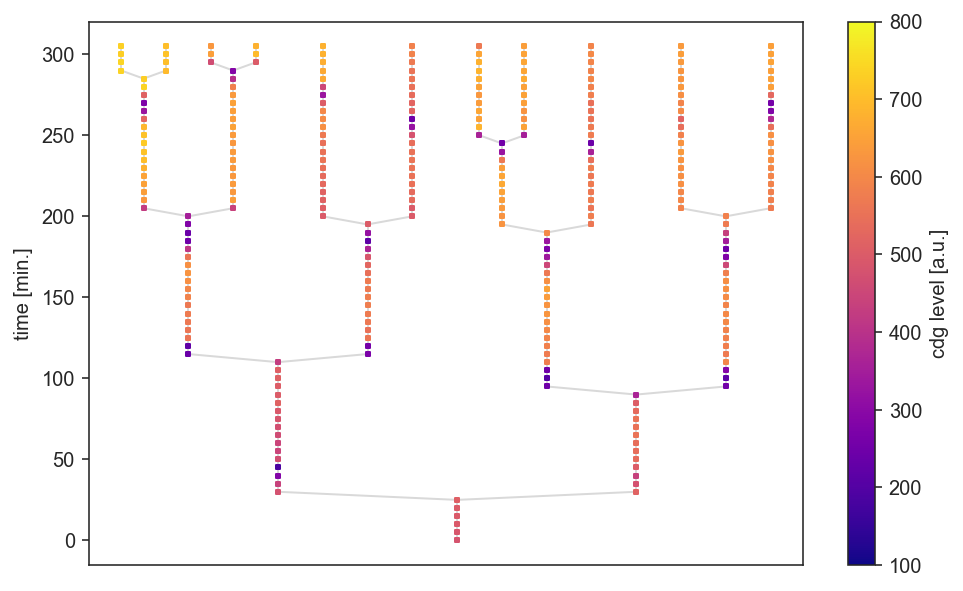

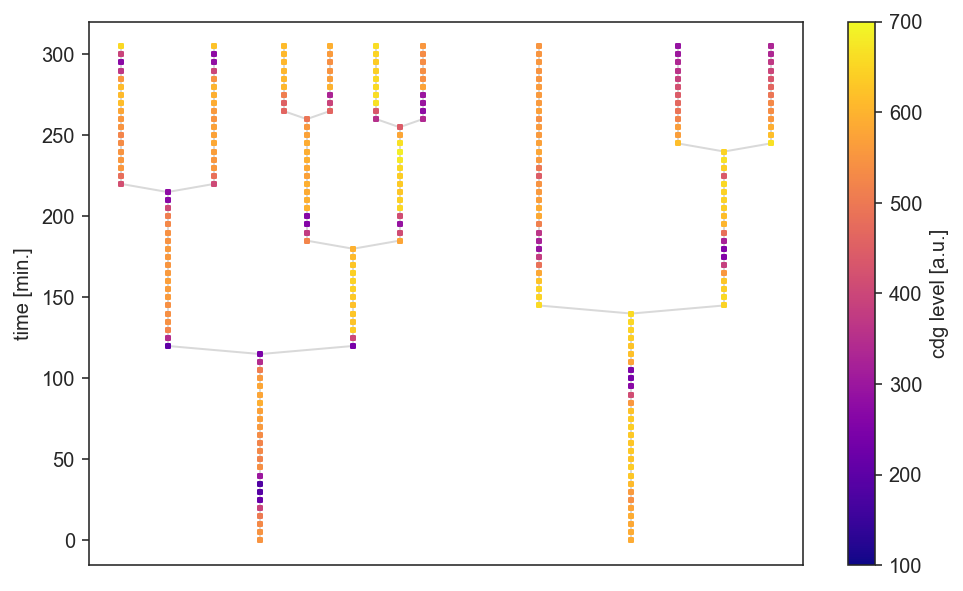

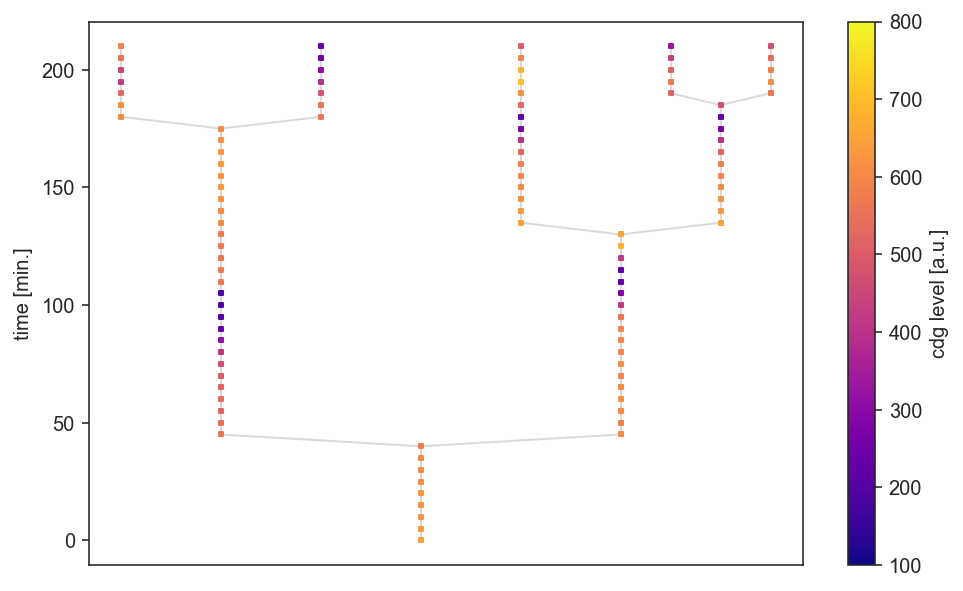

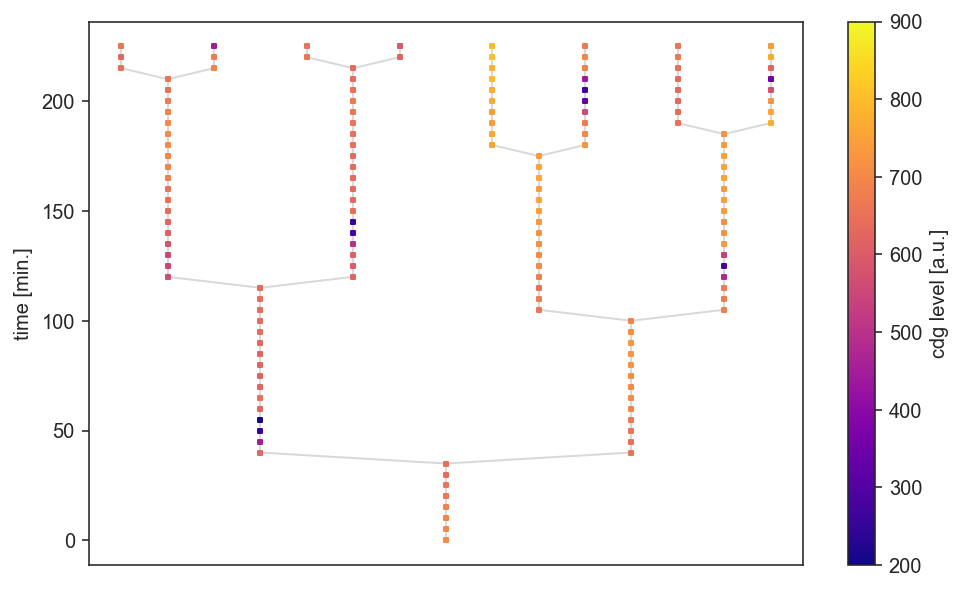

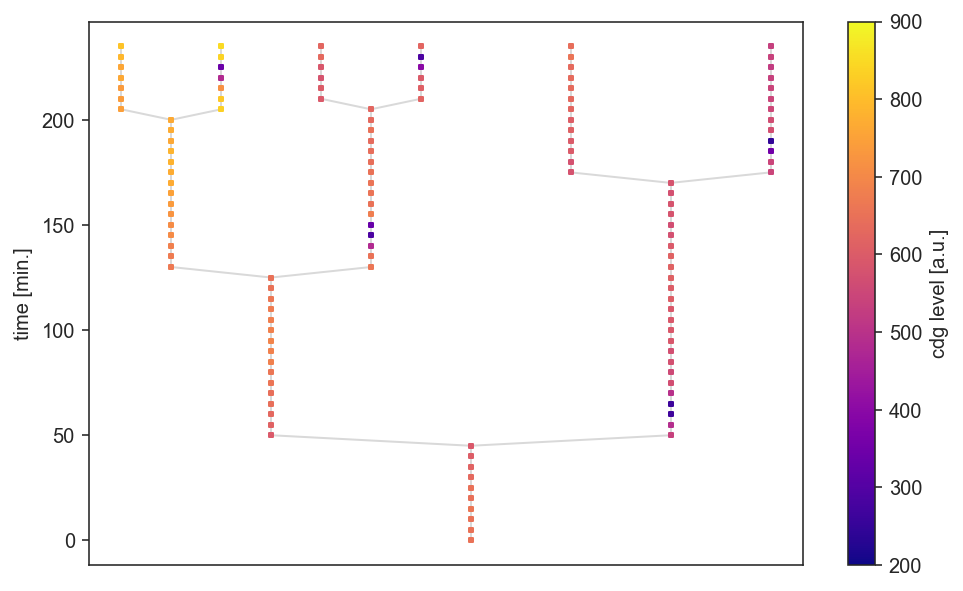

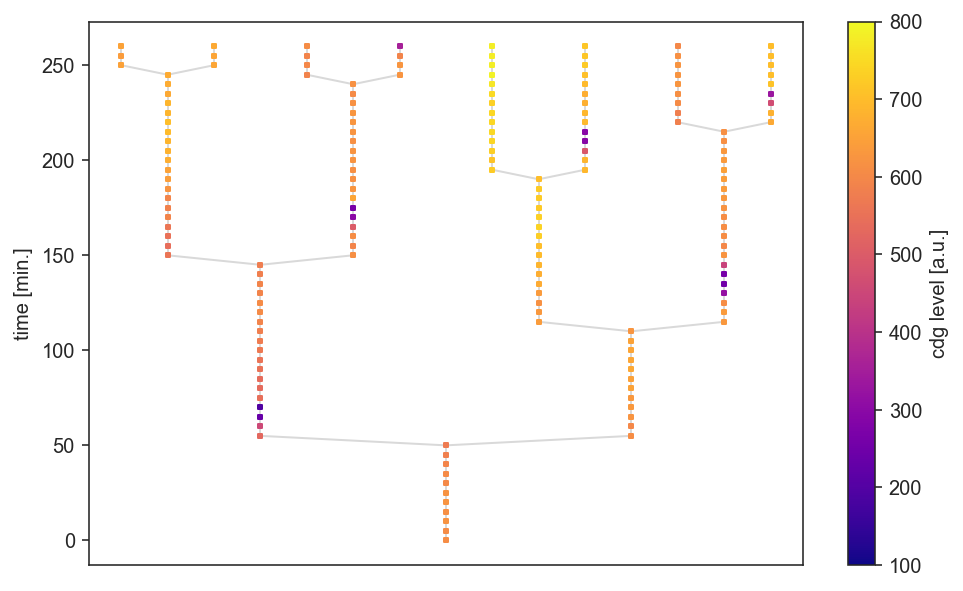

In [23]:
for d in data_list:
    df_name = d['df']
    col_id = d['col']

    df = pd.read_csv(data_dir / df_name)
    df_col = df.loc[df['id_colony'].isin(col_id)]

    lt1 = lineage_tree_2d(df_col, 'fluo1', frame_int=5)  
    fig, axs = lt1.plot_lin_tree(cb_int=100, cb_label='cdg level [a.u.]')

    save_name = im_dir / df_name.replace('.csv','_c%i.svg' % col_id[0])
    fig.savefig(save_name)